<font size="6">Exploratory Data Analysis (EDA)</font>

<font size="5"> Introduction

Form the previous notebook, cleaned new dataset, "Loan_data" was created. In this notebook, the new dataset will be used for further analysis. The dataset will be visualized to understand the distribution of the samples, and understand the relationship between each features. 

<font size="5"> Import and load

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('../Capstone-3-/file/loan_data.csv',index_col='Unnamed: 0')

In [12]:
df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Job_Yrs,House_Yrs,Risk_Flag
0,1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,REWA,MADHYA_PRADESH,3,13,0
1,2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,PARBHANI,MAHARASHTRA,9,13,0
2,3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,ALAPPUZHA,KERALA,4,10,0
3,4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,BHUBANESWAR,ODISHA,2,12,1
4,5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,TIRUCHIRAPPALLI,TAMIL_NADU,3,14,1


In [13]:
df.describe()

,Id,Income,Age,Experience,Job_Yrs,House_Yrs,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Numerical and Non-numerical variables are stored in different lists.

In [14]:
df_num=df.dtypes!='object'
num_col=list(df_num[df_num].index)
df_cat=df.dtypes=='object'
cat_col=list(df_cat[df_cat].index)
num_col,cat_col

(['Id', 'Income', 'Age', 'Experience', 'Job_Yrs', 'House_Yrs', 'Risk_Flag'],
 ['Marital_Status',
  'House_Ownership',
  'Car_Ownership',
  'Profession',
  'City',
  'State'])

Proportion of the risk flag in the dataset is visualized and calulcated.

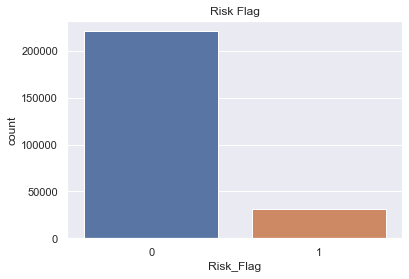

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64

In [15]:
sns.set(font_scale=1)  
sns.countplot(x=df['Risk_Flag'])
plt.title('Risk Flag')
plt.show()
df['Risk_Flag'].value_counts(normalize=True)*100

87.7 percent of the dataset has no risk and only 12.3 percent of the dataset had risk present. The dataset is highly imbalanced therefore it must be dealt before creating models.

<font size="5"> Visualize the distribution

First, all the numerical columns are plotted with each other to see any relationship between each features with risk flag indicated with a color. However, it is hard to find features with strong relationship to each other.

Text(0.5, 1.0, 'pairplot of numerical columns')

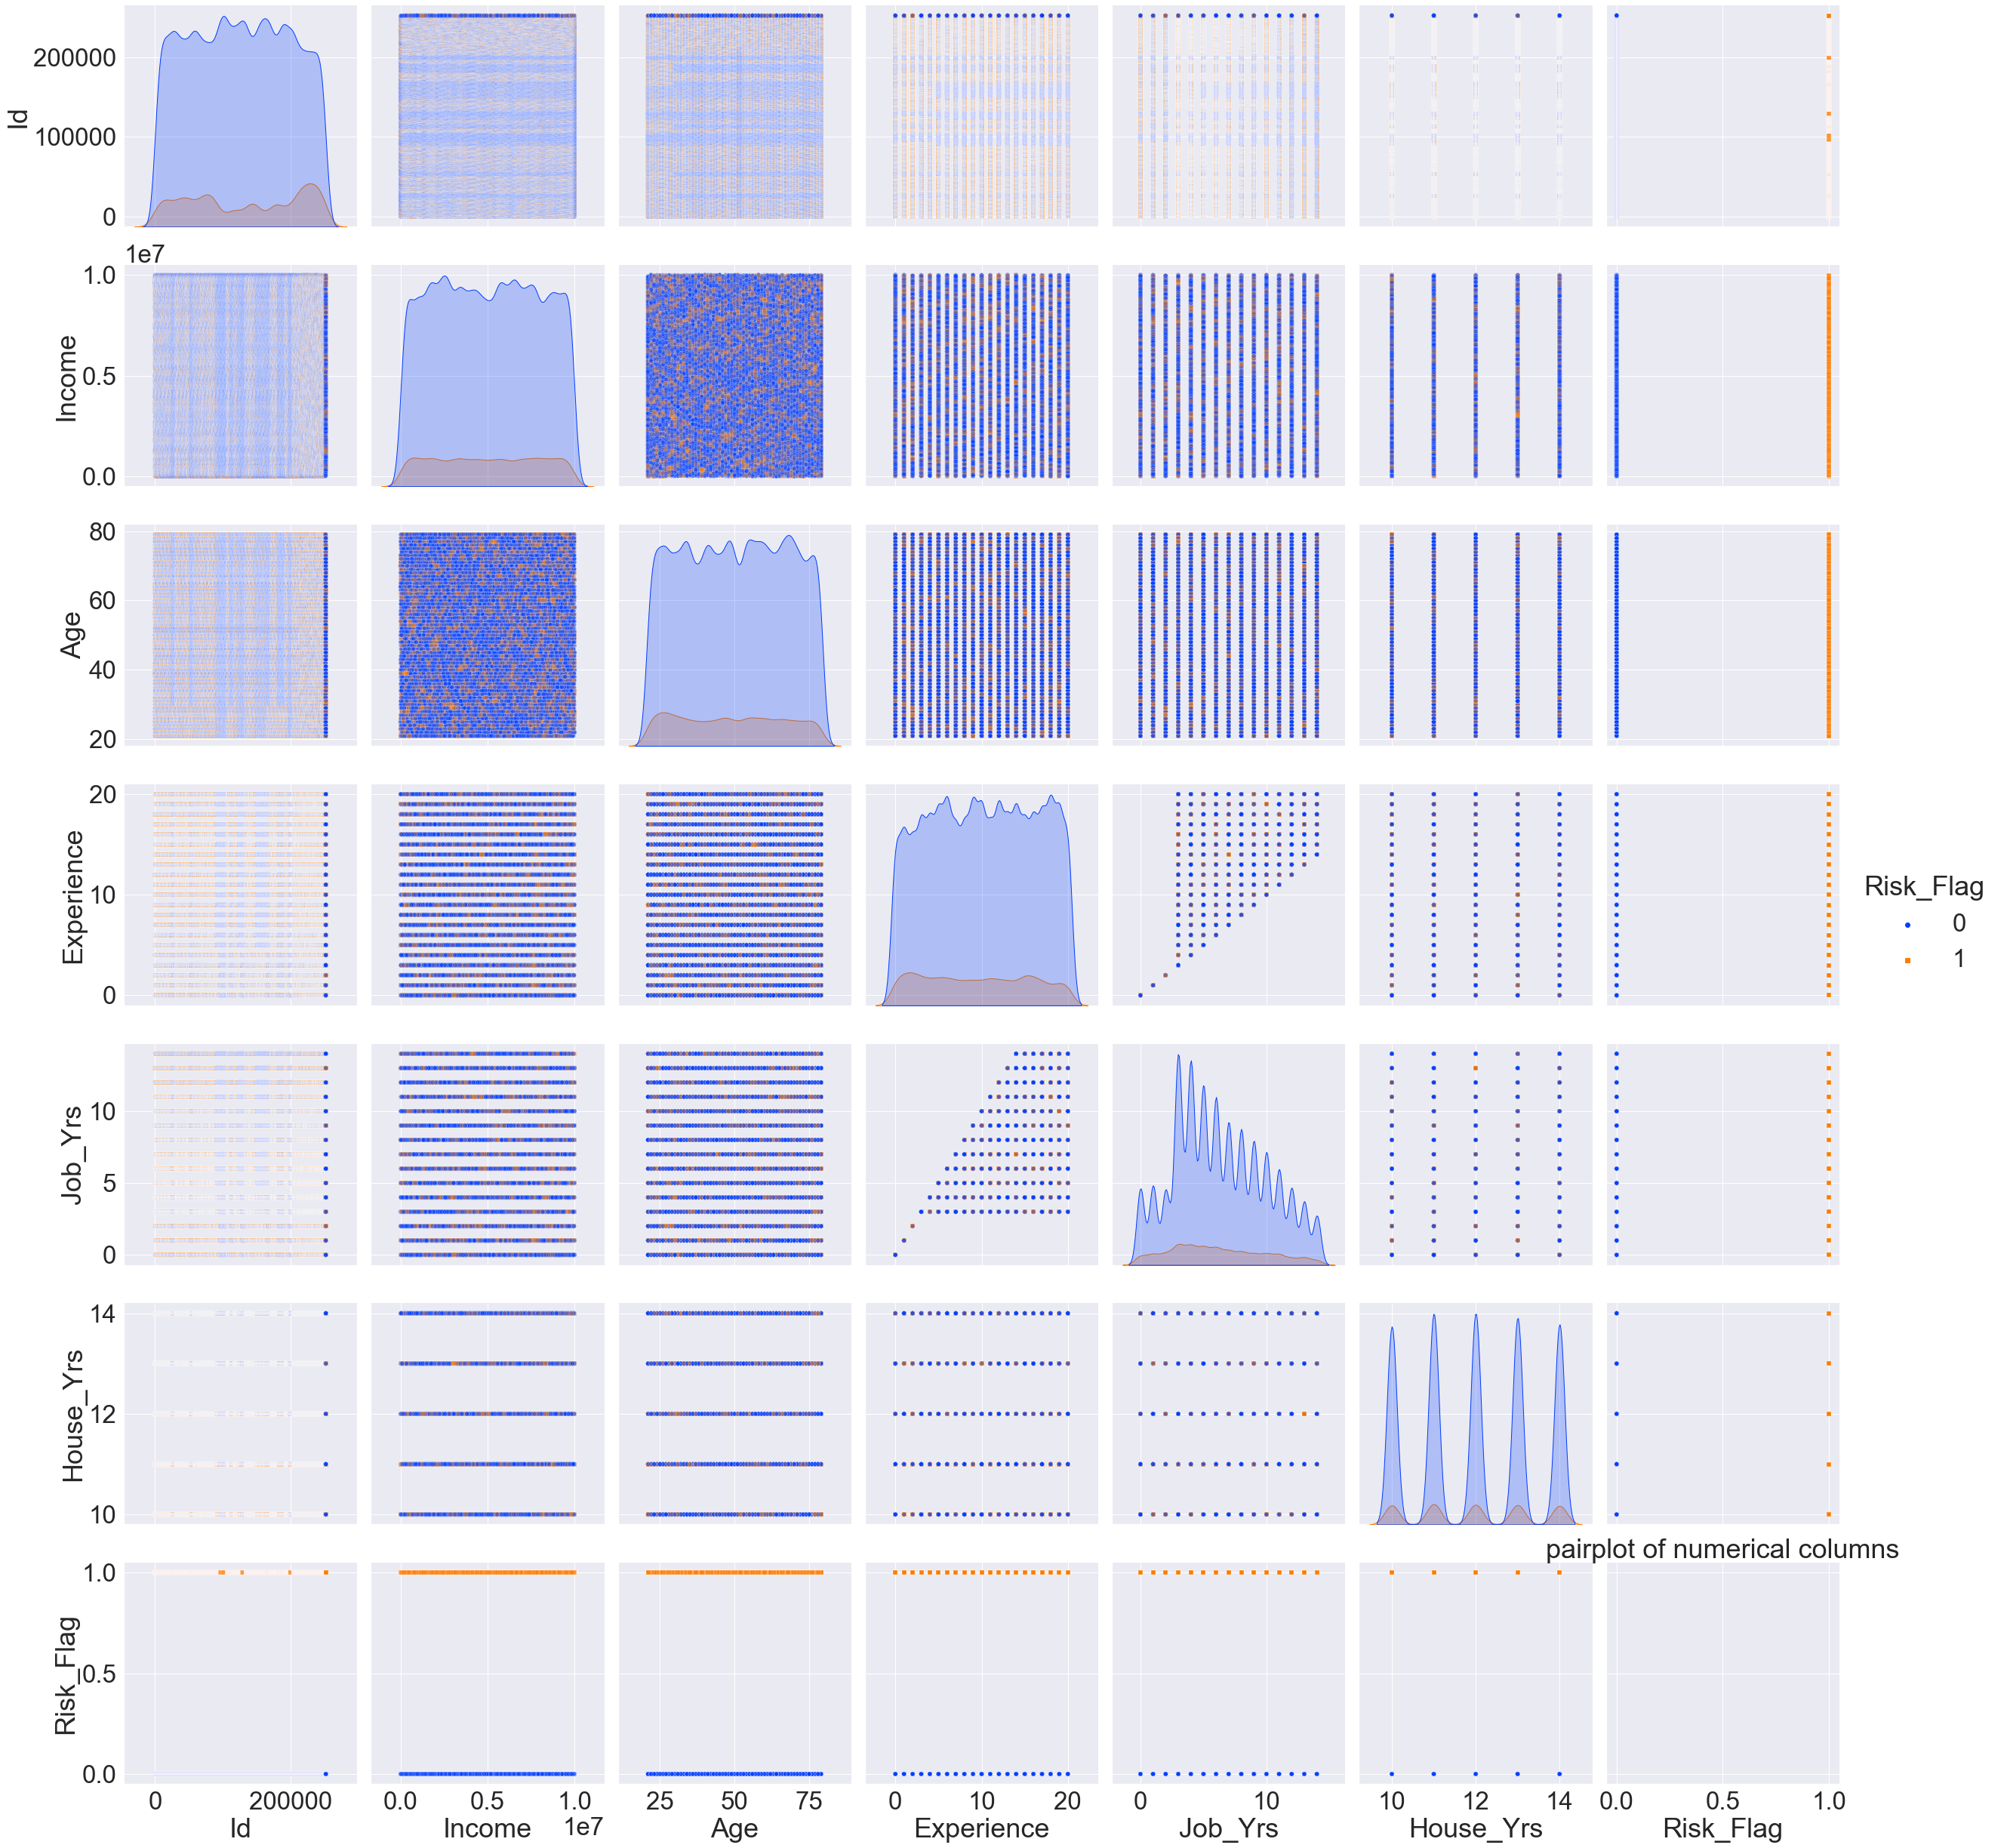

In [7]:
sns.set(font_scale=3)  
sns.pairplot(data=df,y_vars=num_col,x_vars=num_col,hue='Risk_Flag',palette='bright',height=5,markers=['o','s'],plot_kws={'alpha':0.3})
plt.title('pairplot of numerical columns')

Age groups are visualized and the dataset is evenly distributed in terms of 'Age'. Distplot also indicates the mean value of the age.

(array([12957., 13025., 13207., 12559., 13978., 11390., 12860., 11962.,
        12916.,  9170., 11218., 13838., 13106., 13237., 12385., 13056.,
        13640., 12252., 12368., 12876.]),
 array([21. , 23.9, 26.8, 29.7, 32.6, 35.5, 38.4, 41.3, 44.2, 47.1, 50. ,
        52.9, 55.8, 58.7, 61.6, 64.5, 67.4, 70.3, 73.2, 76.1, 79. ]),
 <BarContainer object of 20 artists>)

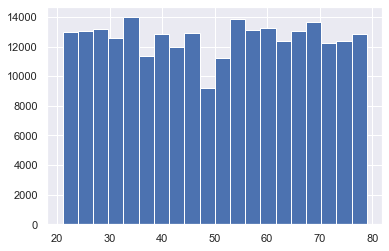

In [16]:
plt.hist(x='Age',data=df,bins=20)

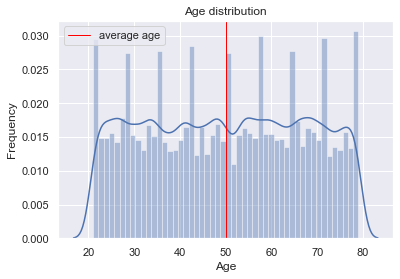

In [17]:
sns.distplot(df['Age'])
plt.axvline(df['Age'].mean(), color='red', linewidth=1,label=str('average age'))
plt.title('Age distribution')
plt.ylabel('Frequency')
plt.legend()

Age and Loan rejected clients disribution are visualized below. As the graph shows, there are more risk of rejection within younger age groups and it drops below the no risk group at the age of 35 and it stays below it for the rest of age groups.

It clearly shows that there are more loan rejections occuring within younger people.

Text(0.5, 1.0, 'Approval Risk by Age')

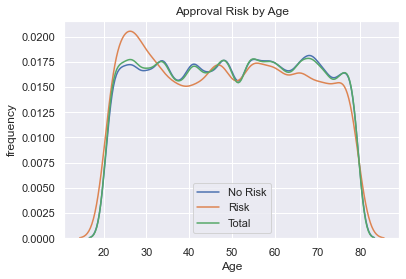

In [19]:
sns.kdeplot('Age',data=df[df.Risk_Flag==0],label='No Risk')
sns.kdeplot('Age',data=df[df.Risk_Flag==1],label='Risk')
sns.kdeplot('Age',data=df,label='Total')
plt.ylabel('frequency')
plt.legend()
plt.title('Approval Risk by Age')

Income distribution of the dataset is plotted with the average income indicated. 

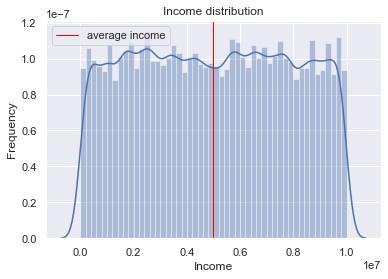

In [20]:
sns.distplot(df['Income'])
plt.axvline(df['Income'].mean(), color='red', linewidth=1,label=str('average income'))
plt.title('Income distribution')
plt.ylabel('Frequency')
plt.legend()

The graph below shows there are more loan approved cases than the no risk group in the lower income group. As the income increases, there is less risk. Surprisingly, the line flips again at the end of high income group again. There are more loan rejected again at 0.8-1.0 income group.

Text(0.5, 1.0, 'Loan Approval Risk by Income')

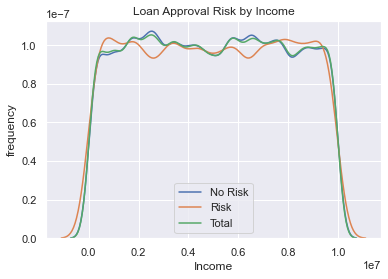

In [21]:
sns.kdeplot('Income',data=df[df.Risk_Flag==0],label='No Risk')
sns.kdeplot('Income',data=df[df.Risk_Flag==1],label='Risk')
sns.kdeplot('Income',data=df,label='Total')
plt.ylabel('frequency')
plt.legend()
plt.title('Loan Approval Risk by Income')

For numerical columns. outliers are checked for overall visualization of the dataset.

In [339]:
num_col_worisk=num_col.copy()

In [340]:
num_col_worisk.remove('Risk_Flag')

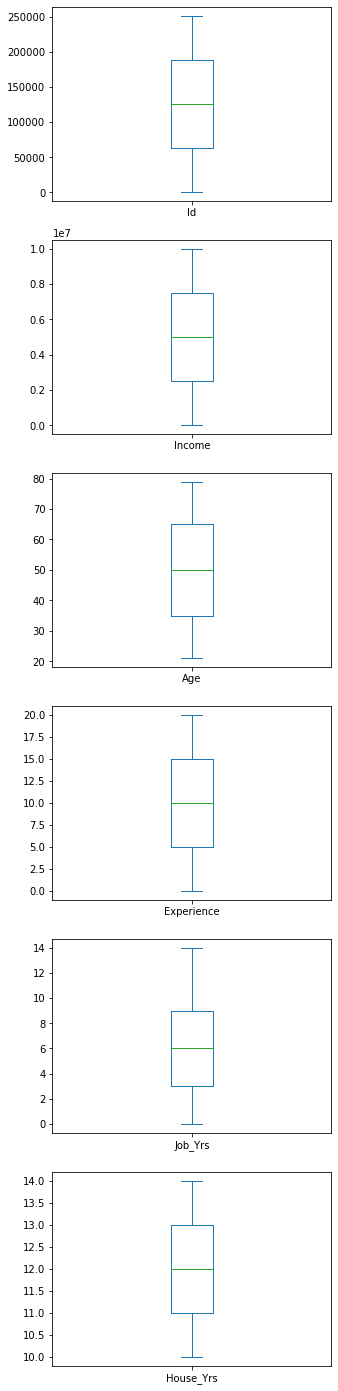

In [341]:
fig, ax = plt.subplots(len(df[num_col_worisk].columns),figsize=(5, 25))
for n, col in enumerate(df[num_col_worisk].columns):
    df[col].plot(kind='box',ax=ax[n])

The dataset's numerical columns do not contian any significant outliers

Below, the distribution of loan rejection in different categorical columns including marital status, house ownership, and car ownership were plotted to check the proportion within different features. 

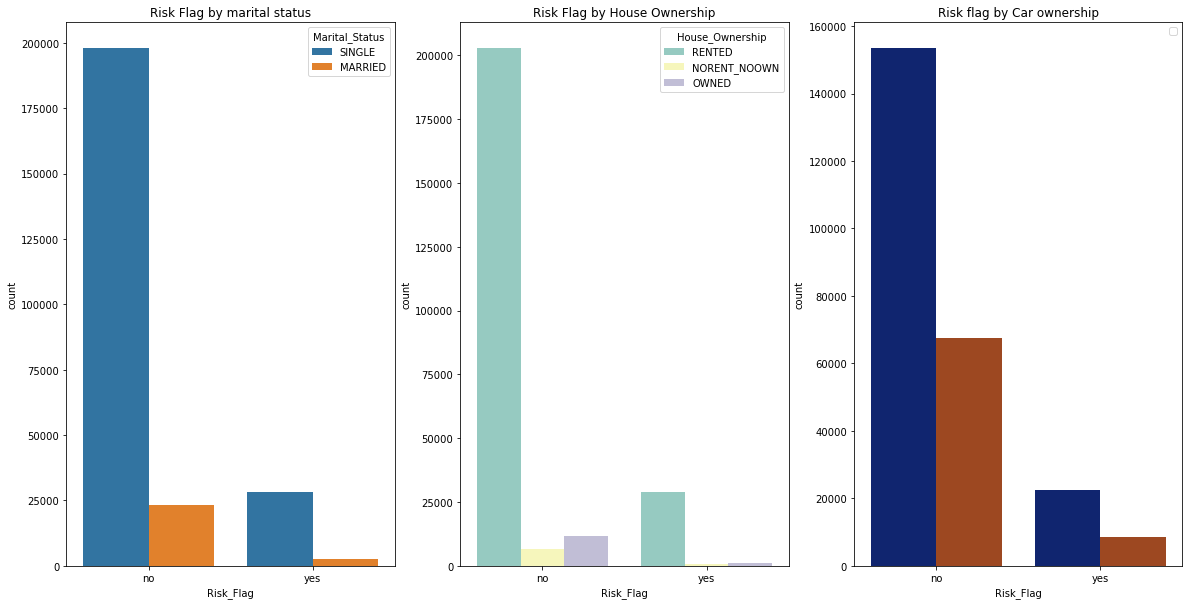

In [342]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
_=sns.countplot(ax=ax[0],x='Risk_Flag',data=df,hue='Marital_Status')
_.set_xticklabels(['no','yes'])
_.set_title('Risk Flag by marital status')
_=sns.countplot(ax=ax[1],x='Risk_Flag',data=df,hue='House_Ownership',palette='Set3')
_.set_xticklabels(['no','yes'])
_.set_title('Risk Flag by House Ownership')
_=sns.countplot(ax=ax[2],x='Risk_Flag',data=df,hue='Car_Ownership',palette='dark')
_.legend(title='Car_Ownership',labels=['no','yes'])
_.set_xticklabels(['no','yes'])
_.set_title('Risk flag by Car ownership')
plt.legend(labels='')

As the three histogram shows, the proportion of loan rejction rate in three features are simillar to no risk group.

Below, only the rejected loan applications are visualized. To visualize the characteristics of rejected loan application overall characteristics.


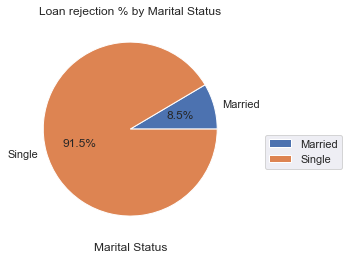

In [18]:
df.loc[df['Risk_Flag'] == 1].groupby('Marital_Status').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Loan rejection % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

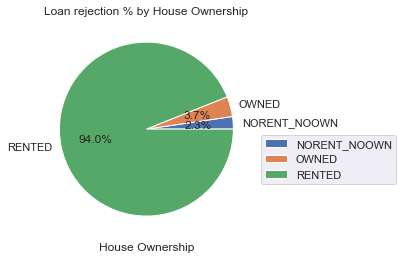

In [19]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('House Ownership')
plt.title('Loan rejection % by House Ownership')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

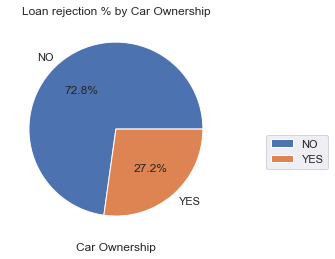

In [20]:
df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Loan rejection % by Car Ownership')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

As three pie charts show, most of the rejected applicants are single, renting a house, and do not own a car. All three categories can partially explain the financial status of the rejected applicants.

<font size="5"> Visualization by the City and State.

Loan status was plotted by city and state. The charts and greaphs below show, where most of the loan applications are made from and most of loan rejections are happening at.

In [21]:
df3=df.groupby('State').count()
df3.rename(columns={'Id':"Total Loans"},inplace=True)
df3.reset_index(inplace=True)
df4=df3[['State','Total Loans']]
df5=df4.sort_values(by='Total Loans',ascending=False)[:10]
df5

,State,Total Loans
26,UTTAR_PRADESH,29143
14,MAHARASHTRA,25562
0,ANDHRA_PRADESH,25297
27,WEST_BENGAL,23483
2,BIHAR,19780
22,TAMIL_NADU,16537
13,MADHYA_PRADESH,14122
11,KARNATAKA,11855
6,GUJARAT,11408
20,RAJASTHAN,9174


In [22]:
df1 = df.loc[df['Risk_Flag'] == 1].groupby(['State','Risk_Flag']).count()
df1.rename(columns={'Id':'# of Risk Flag'},inplace=True)
df1.reset_index(inplace=True)
df2=df1[['State','# of Risk Flag']]
df6=df2.sort_values(by='# of Risk Flag',ascending=False)[:10]
df6

,State,# of Risk Flag
26,UTTAR_PRADESH,3440
27,WEST_BENGAL,3009
0,ANDHRA_PRADESH,2935
14,MAHARASHTRA,2895
2,BIHAR,2583
13,MADHYA_PRADESH,2180
22,TAMIL_NADU,1706
6,GUJARAT,1343
20,RAJASTHAN,1292
10,JHARKHAND,1195


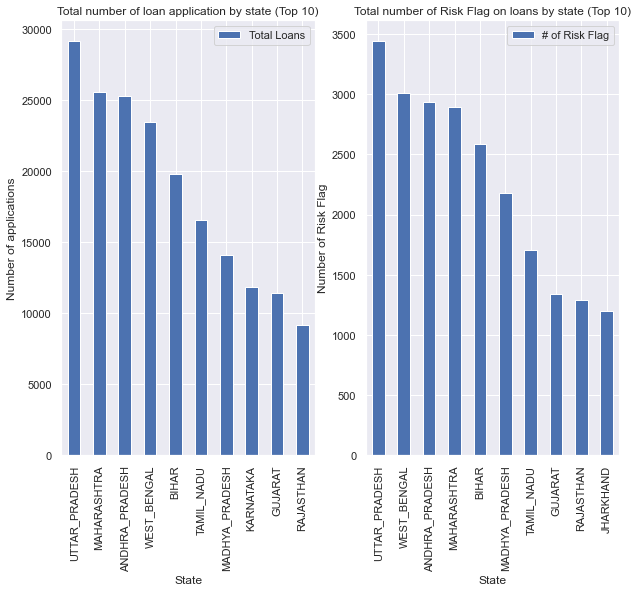

In [23]:
fig,ax=plt.subplots(1,2,figsize=(10,8))
_=df5.plot(ax=ax[0],kind='bar',x='State',figsize=(10,8))
_.set_title('Total number of loan application by state (Top 10)')
_.set_xlabel('State')
_.set_ylabel('Number of applications')
df6.plot(ax=ax[1],kind='bar',x='State',figsize=(10,8))
plt.title('Total number of Risk Flag on loans by state (Top 10)')
plt.xlabel('State')
plt.ylabel('Number of Risk Flag')
plt.show()

As the graphs and charts show, top 10 states with number of loan applications are also in the top 10 states of the loan rejections occured at. It explains that, loan dafault proportion is about the same for states and they are not highly correlated.

Loan status by city is also plotted with charts and graph below.

In [24]:
df_city1= df.groupby('City').count()
df_city1.rename(columns={'Id':'Total_loans'},inplace=True)
df_city1.reset_index(inplace=True)
df_city2=df_city1[['City','Total_loans']]
df_city3=df_city2.sort_values(by='Total_loans',ascending=False)[:10]
df_city3

,City,Total_loans
24,AURANGABAD,1543
311,VIJAYANAGARAM,1259
52,BHOPAL,1208
63,BULANDSHAHR,1185
255,SAHARSA,1180
312,VIJAYAWADA,1172
279,SRINAGAR,1136
125,INDORE,1130
213,NEW_DELHI,1098
112,HAJIPUR,1098


In [25]:
df_city4= df.loc[df['Risk_Flag'] == 1].groupby(['City','Risk_Flag']).count()
df_city4.rename(columns={'Id':'# of Risk Flag'},inplace=True)
df_city4.reset_index(inplace=True)
df_city5=df_city4[['City','# of Risk Flag']]
df_city6=df_city5.sort_values(by='# of Risk Flag',ascending=False)[:10]
df_city6

,City,# of Risk Flag
159,KOCHI,243
262,SATNA,232
65,BUXAR,228
279,SRINAGAR,216
125,INDORE,212
31,BARASAT,206
183,MANGO,200
53,BHUBANESWAR,198
100,GHAZIABAD,196
269,SIKAR,191


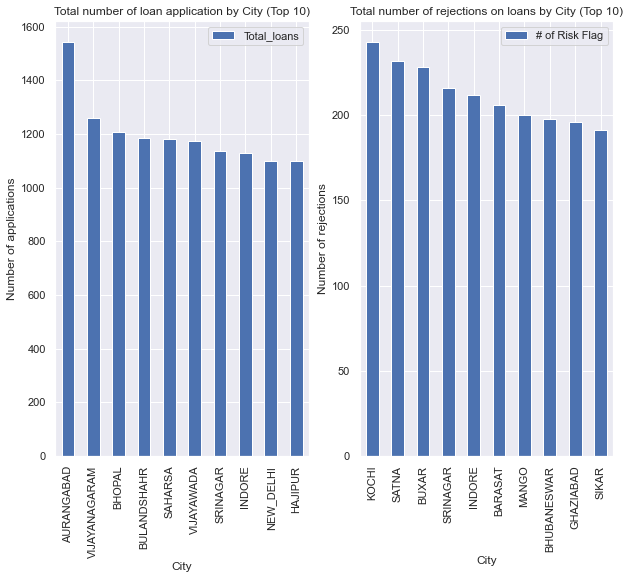

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,8))
_=df_city3.plot(ax=ax[0],kind='bar',x='City',figsize=(10,8))
_.set_title('Total number of loan application by City (Top 10)')
_.set_xlabel('City')
_.set_ylabel('Number of applications')
df_city6.plot(ax=ax[1],kind='bar',x='City',figsize=(10,8))
plt.title('Total number of rejections on loans by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of rejections')
plt.show()

Surprisingly, the city list in top 10 loan applications and city list in top 10 number of loan rejctions are totally different. It might indicate that the proportion of rejected loans may vary by city.

<font size="5"> Visualization by the Profession.

Loan Status by profession was visualized. The charts and graphs shows professions with highest number of loan applications and number of rejections.

In [27]:
df_prof=df.groupby('Profession').count()
df_prof.rename(columns={'Id':'Total applications'},inplace=True)
df_prof.reset_index(inplace=True)
df_prof1=df_prof[['Profession','Total applications']]
df_prof5=df_prof1.sort_values(by='Total applications',ascending=False)[:10]
df_prof5

,Profession,Total applications
37,PHYSICIAN,5957
44,STATISTICIAN,5806
50,WEB_DESIGNER,5397
40,PSYCHOLOGIST,5390
13,COMPUTER_HARDWARE_ENGINEER,5372
19,DRAFTER,5359
32,MAGISTRATE,5357
22,FASHION_DESIGNER,5304
0,AIR_TRAFFIC_CONTROLLER,5281
12,COMEDIAN,5259


In [28]:
df_prof2= df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).count()
df_prof2.rename(columns={'Id':'# of Risk Flag'},inplace=True)
df_prof2.reset_index(inplace=True)
df_prof3=df_prof2[['Profession','# of Risk Flag']]
df_prof4=df_prof3.sort_values(by='# of Risk Flag',ascending=False)[:10]
df_prof4

,Profession,# of Risk Flag
38,POLICE_OFFICER,826
43,SOFTWARE_DEVELOPER,750
0,AIR_TRAFFIC_CONTROLLER,715
46,SURVEYOR,714
37,PHYSICIAN,710
3,ARMY_OFFICER,709
28,HOTEL_MANAGER,701
47,TECHNICAL_WRITER,697
7,CHARTERED_ACCOUNTANT,690
41,SCIENTIST,690


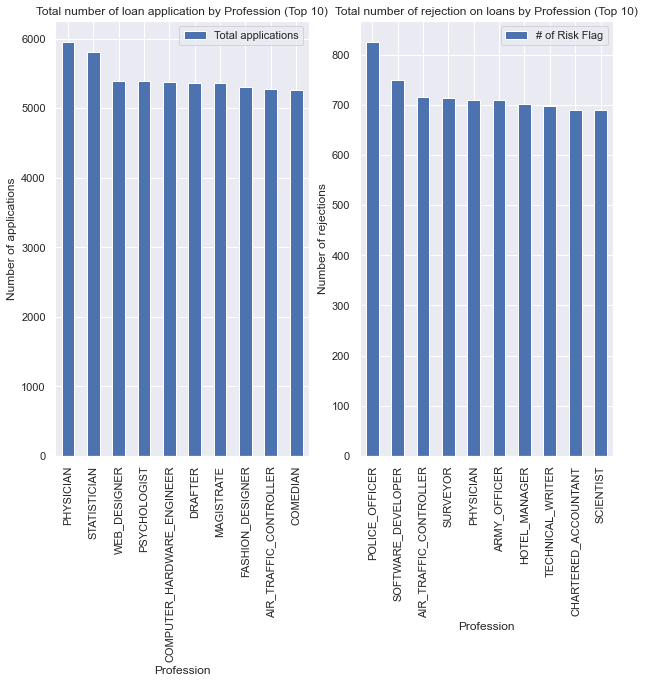

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,8))
_=df_prof5.plot(ax=ax[0],kind='bar',x='Profession',figsize=(10,8))
_.set_title('Total number of loan application by Profession (Top 10)')
_.set_xlabel('Profession')
_.set_ylabel('Number of applications')
df_prof4.plot(ax=ax[1],kind='bar',x='Profession',figsize=(10,8))
plt.title('Total number of rejection on loans by Profession (Top 10)')
plt.xlabel('Profession')
plt.ylabel('Number of rejections')
plt.show()

The proportion of loan rejection rate is different for all professions. Top 5 professions applied for loan includes physician, statistican, web designer, psychologist and computer engineer and top 5 profession with rejected applicant is police officer, software developer, air traffic controller, surveyor and physician. Only physician is included in both lists.

10 professions with low income are listed below to compare them with the top 10 rejected applicant chart.

In [30]:
df_prof11=df.groupby('Profession').mean()
df_prof20=df_prof11[['Income']].sort_values(by='Income')[:10]
df_prof20

,Income
Profession,
POLICE_OFFICER,4.502916e+06
FLIGHT_ATTENDANT,4.592177e+06
DRAFTER,4.654805e+06
OFFICIAL,4.737617e+06
CIVIL_ENGINEER,4.755441e+06
MAGISTRATE,4.769920e+06
PHYSICIAN,4.780384e+06
ENGINEER,4.814755e+06
CHEF,4.839915e+06


Text(0, 0.5, 'Mean income')

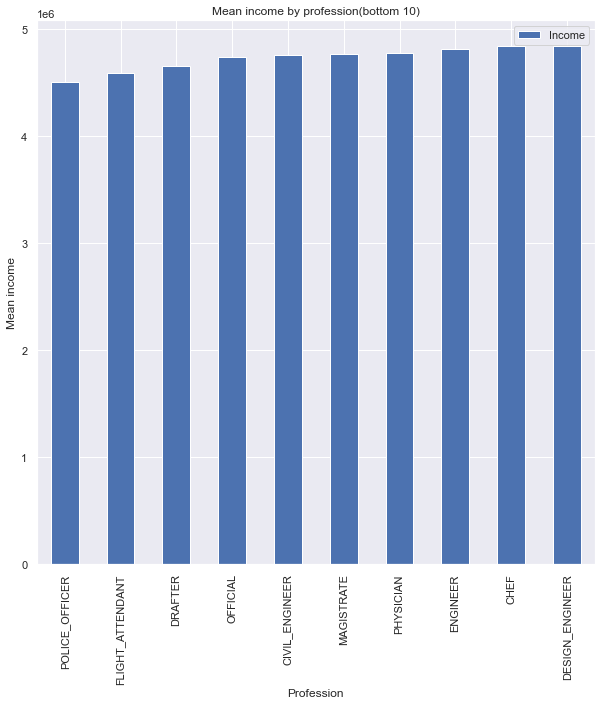

In [31]:
df_prof20.plot(kind='bar',figsize=(10,10))
plt.title('Mean income by profession(bottom 10)')
plt.xlabel('Profession')
plt.ylabel('Mean income')

As the chart shows above, police officer is ranked first in loan rejection rate, and lowest income. It clearly shows, that there are higher chance of rejection for clients with low income.

<font size="5"> Correlation

Correlation of each columns is plotted below.

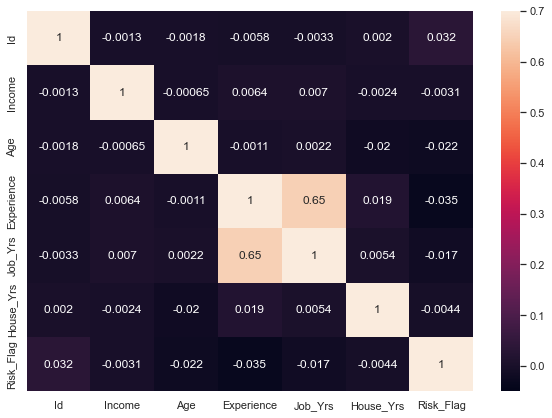

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot=True,vmin=-0.05,vmax=0.7);

Each columns have no to very weak correlation except for job years and total career experience, since there are lot of people with one job through out the whole career.

Since, the low income profession are ranked high in loan rejection rate, the dataset was devided in to two different groups with below average income and abover average income.

In [33]:
df_avg_above=df.loc[df['Income']>df['Income'].mean()]
df_avg_below=df.loc[df['Income']<df['Income'].mean()]

In [34]:
df_avg_above.value_counts('Risk_Flag')

Risk_Flag
0    110635
1     15449
dtype: int64

In [35]:
df_avg_below.value_counts('Risk_Flag')

Risk_Flag
0    110369
1     15547
dtype: int64

The graph below shows number of poeple in different groups by different age. As expected, there are more poeple in below average group in the younger age group and more people in above average group in older group.

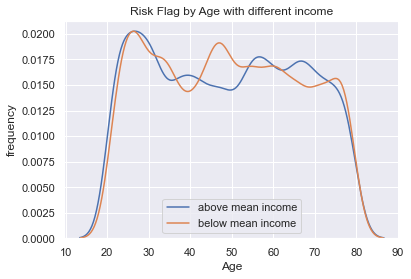

In [36]:
_=sns.kdeplot('Age',data=df_avg_above[df_avg_above.Risk_Flag==1],label='above mean income')
sns.kdeplot('Age',data=df_avg_below[df_avg_below.Risk_Flag==1],label='below mean income')
_=plt.ylabel('frequency')
_=plt.legend()
_=plt.title('Risk Flag by Age with different income')

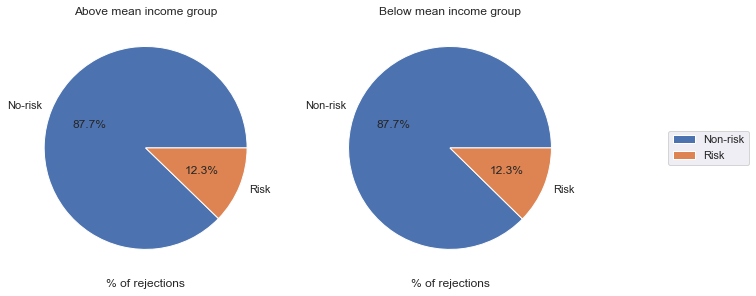

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title('Above mean income group')
df_avg_above.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['No-risk','Risk'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of rejections')
plt.ylabel('')

ax2 = fig.add_subplot(122)
plt.title('Below mean income group')
df_avg_below.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-risk','Risk'],autopct='%1.1f%%',ax=ax2,figsize=(10,10))
plt.xlabel('% of rejections')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))

As the pie charts show above, the two groups had exactly the same proportion of loan rejection rate, therefore income might not be an great feature to determine the risk of loan application.

Lastly, marital status and house ownership relationship with risk of loan application was visualized.

Text(0.5, 3.3, 'Risk Flag by Marital Status and house ownership')

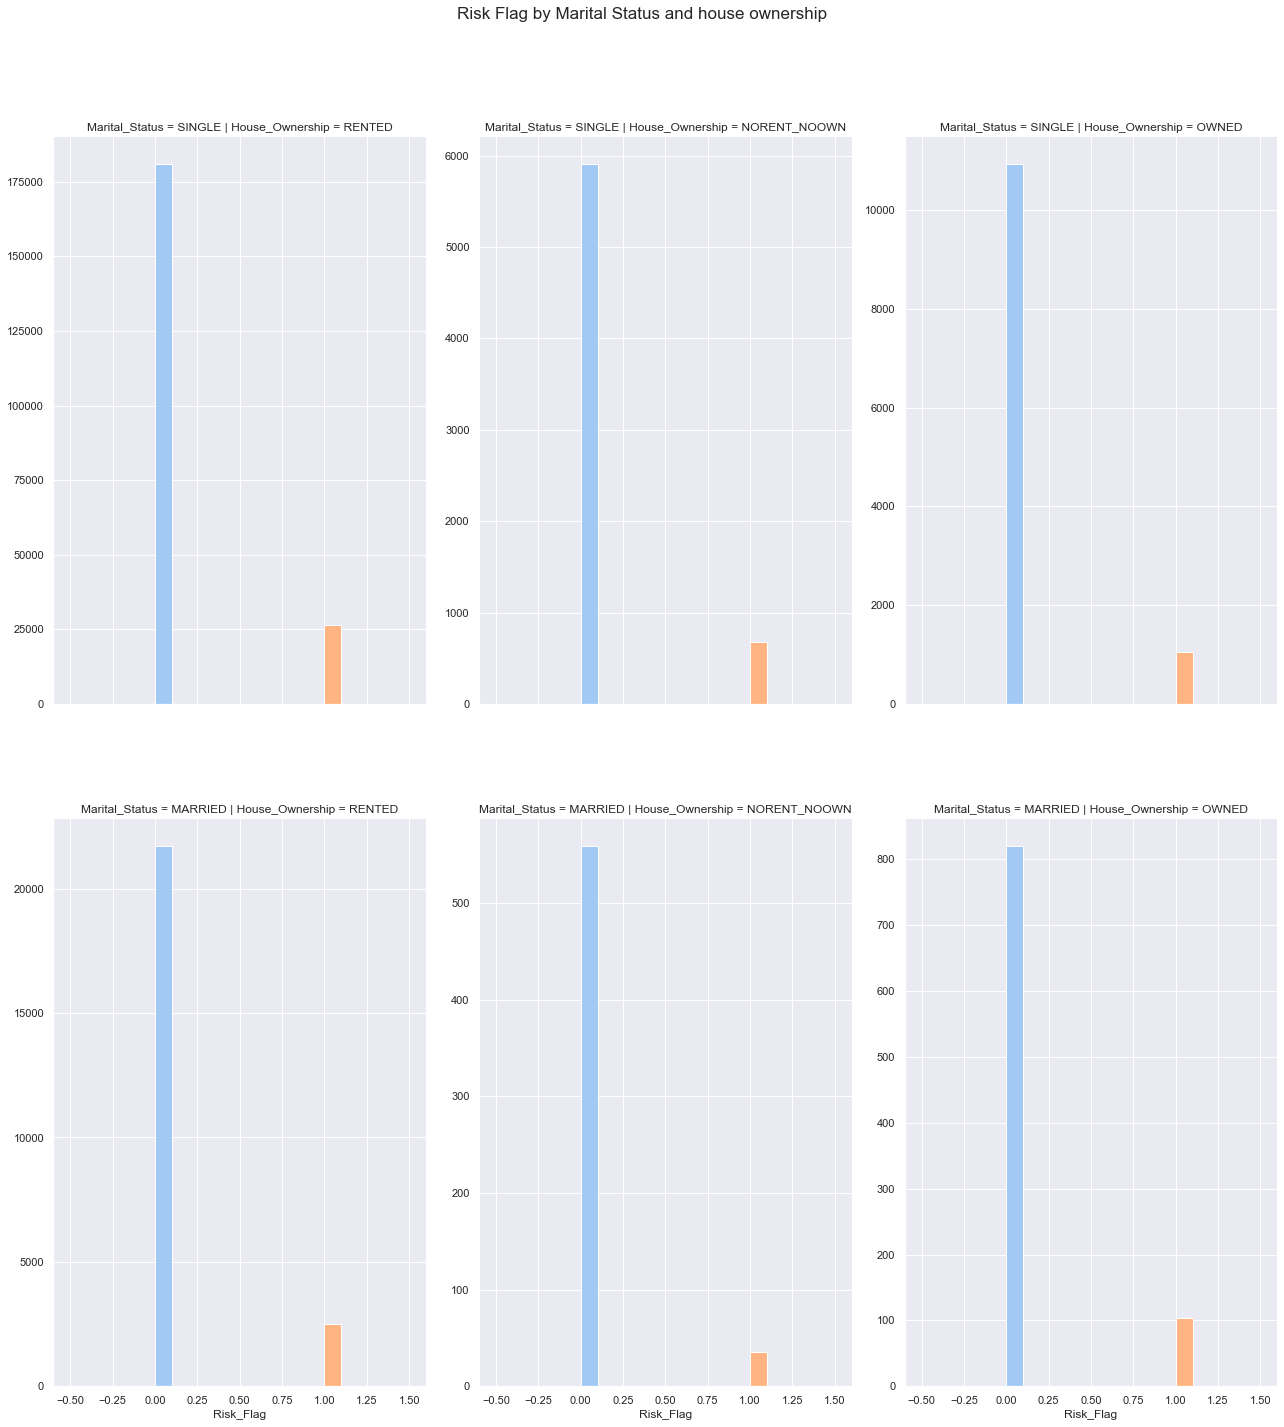

In [38]:
_=sns.FacetGrid(row='Marital_Status',col='House_Ownership',hue='Risk_Flag',data=df,aspect=2,palette='pastel',sharey=False)
_.map(plt.hist,'Risk_Flag')
_.fig.subplots_adjust(top=3)
_.fig.suptitle('Risk Flag by Marital Status and house ownership',y=3.3,size=17)

As we have mentioned above, single and rented that indicates, younger people with poor financial status, had the highest proportion of loan rejection rate and married and not owned a house had a lowest proportion of loan rejection rate. 

<font size="5"> Tableau Visualization

https://public.tableau.com/views/edac3/StateandCityVisualization?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Overall distribution of the dataset was visualized using Tableau and it can be accessed from the link above. The visualization inlcude, risk flag, age group, marital status, house ownership and state/city distribution.

<font size="5"> Conclusion

From this notebook, the dataset was analyzed and visualized using python and tableau. First, numerical and non-numerical columns are divided for future use.

<br>With the dataset, pairplot was created to identify any strong relationship between each numerical columns and the pairplot showed no to very weak relationship between each columns. After, overall distribution of the dataset was visualized inclduing proportion of the 'Risk Flag' column and its relationship to age and income. Age and 'Risk Flag' showed a weak relationship however, it was hard to find a relationship between income level and 'Risk Flag' column. 

<br>Also, numerical columns' boxplots were created to check for any outliers and non-numerical columns were visualized using pie chart and histograms. Lastly, dataset was visualized by city and state and income level again. Surprisingly, above average income group and below average income group had exact same loan rejection rate.

<br>Tableau Visualization was created to help the understanding of the overall picture of the dataset. Most importantly to identify if each city/state contains information of very dissimilar groups. In such a case, model should be developed for each city/state. However, as a story from Tableau shows, each state contained similar population in terms of income level, age groups, house ownership and number of population. 

<br>In conclusion, exploratory data analysis was conducted on dataset and a single model can be developed for a whole nation instead of city/state.


In the next notebook, the data will be preprocessed before a machine learning model is developed for loan prediction.The dataset still has categorical variables and numerical variables in the same dataframe. Also some of the categorical variables are labelled numerically therefore the dataset must be encoded before a model is created.